# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | paulden
Processing Record 3 of Set 1 | chimore
Processing Record 4 of Set 1 | brisas barra de suchiate
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | borkum
Processing Record 7 of Set 1 | duyun
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | thulamahashi
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | revda
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | ghat
Processing Record 21 of Set 1 | kimbe
Processing Record 22 of Set 1 | igrim
Processing Record 23 of 

Processing Record 40 of Set 4 | menongue
Processing Record 41 of Set 4 | punta del este
Processing Record 42 of Set 4 | vernon
Processing Record 43 of Set 4 | elliot
Processing Record 44 of Set 4 | ardakan
Processing Record 45 of Set 4 | rongelap
Processing Record 46 of Set 4 | caninde
Processing Record 47 of Set 4 | three points
Processing Record 48 of Set 4 | yangor
City not found. Skipping...
Processing Record 49 of Set 4 | kismayo
Processing Record 0 of Set 5 | januaria
Processing Record 1 of Set 5 | wailua homesteads
Processing Record 2 of Set 5 | jalai nur
Processing Record 3 of Set 5 | ulsteinvik
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | porvoo
Processing Record 6 of Set 5 | ngetkib
Processing Record 7 of Set 5 | vangaindrano
Processing Record 8 of Set 5 | thompson
Processing Record 9 of Set 5 | tondi
Processing Record 10 of Set 5 | utrik
Processing Record 11 of Set 5 | brockville
Processing Record 12 of Set 5 | kitimat
Processing Record 13 of Set 5 | 

Processing Record 34 of Set 8 | kodinsk
Processing Record 35 of Set 8 | santana
Processing Record 36 of Set 8 | pisco
Processing Record 37 of Set 8 | san pedro
Processing Record 38 of Set 8 | oualidia
City not found. Skipping...
Processing Record 39 of Set 8 | carutapera
Processing Record 40 of Set 8 | afaahiti
Processing Record 41 of Set 8 | mananara
Processing Record 42 of Set 8 | hami
Processing Record 43 of Set 8 | bei'an
Processing Record 44 of Set 8 | ulladulla
Processing Record 45 of Set 8 | malax
Processing Record 46 of Set 8 | taulaga
Processing Record 47 of Set 8 | glubokoye
Processing Record 48 of Set 8 | new norfolk
Processing Record 49 of Set 8 | celestun
Processing Record 0 of Set 9 | selfoss
Processing Record 1 of Set 9 | klaksvik
Processing Record 2 of Set 9 | san juan del sur
Processing Record 3 of Set 9 | uturoa
Processing Record 4 of Set 9 | sumbe
Processing Record 5 of Set 9 | khandyga
Processing Record 6 of Set 9 | ta`u
Processing Record 7 of Set 9 | igarka
Process

Processing Record 23 of Set 12 | myrina
Processing Record 24 of Set 12 | kunwi
Processing Record 25 of Set 12 | santiago de cao
Processing Record 26 of Set 12 | changsha
Processing Record 27 of Set 12 | teknaf
Processing Record 28 of Set 12 | borogontsy
Processing Record 29 of Set 12 | destin
Processing Record 30 of Set 12 | nchelenge
Processing Record 31 of Set 12 | sirte
Processing Record 32 of Set 12 | opuwo
Processing Record 33 of Set 12 | farragut
Processing Record 34 of Set 12 | jaisalmer
Processing Record 35 of Set 12 | sungailiat
Processing Record 36 of Set 12 | kruisfontein
Processing Record 37 of Set 12 | araxa
Processing Record 38 of Set 12 | ahau
City not found. Skipping...
Processing Record 39 of Set 12 | laguna
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-33.14,100,79,0.75,RU,1707093133
1,paulden,34.8856,-112.4682,11.15,47,0,2.68,US,1707093304
2,chimore,-16.9833,-65.1333,25.33,77,15,1.94,BO,1707093304
3,brisas barra de suchiate,14.5500,-92.2167,28.10,72,1,5.77,MX,1707093305
4,waitangi,-43.9535,-176.5597,16.47,79,100,5.74,NZ,1707093305


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-33.14,100,79,0.75,RU,1707093133
1,paulden,34.8856,-112.4682,11.15,47,0,2.68,US,1707093304
2,chimore,-16.9833,-65.1333,25.33,77,15,1.94,BO,1707093304
3,brisas barra de suchiate,14.5500,-92.2167,28.10,72,1,5.77,MX,1707093305
4,waitangi,-43.9535,-176.5597,16.47,79,100,5.74,NZ,1707093305


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

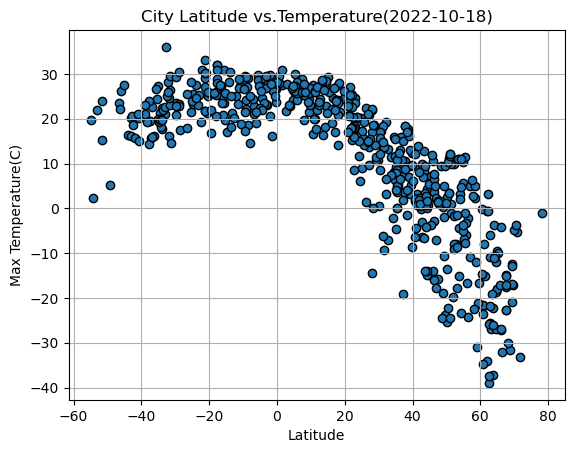

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

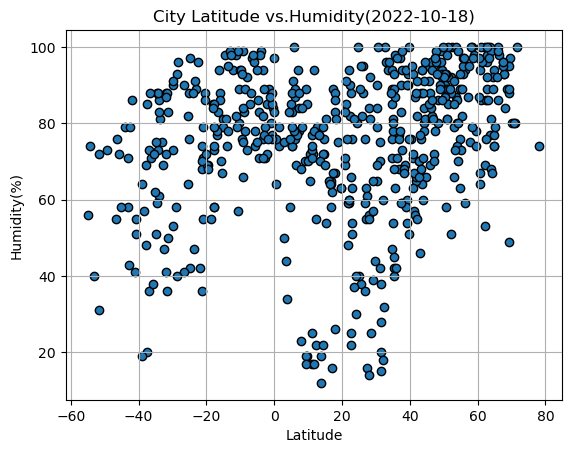

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

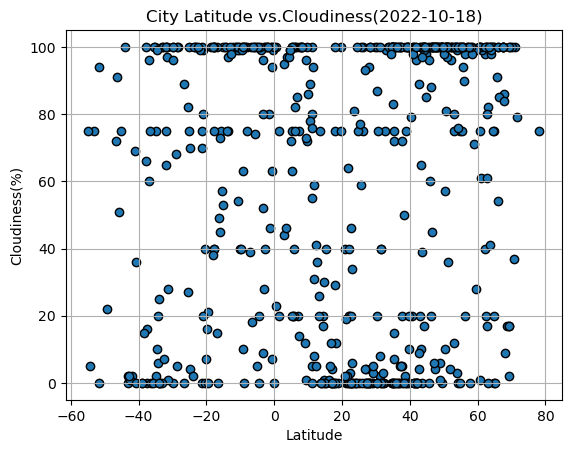

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

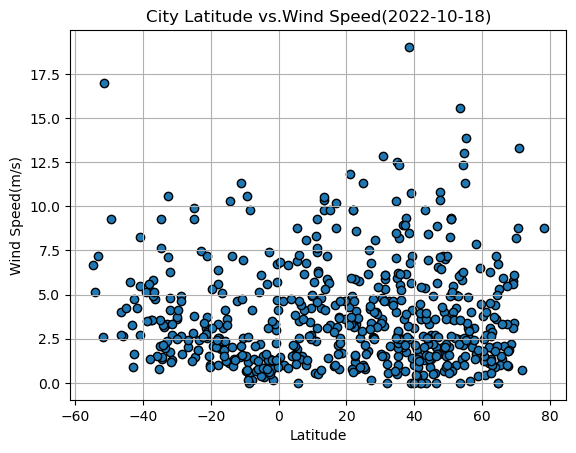

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-33.14,100,79,0.75,RU,1707093133
1,paulden,34.8856,-112.4682,11.15,47,0,2.68,US,1707093304
3,brisas barra de suchiate,14.5500,-92.2167,28.10,72,1,5.77,MX,1707093305
5,borkum,53.5809,6.6915,11.07,87,100,15.55,DE,1707093306
6,duyun,26.2667,107.5167,1.49,95,100,1.82,CN,1707093307


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,chimore,-16.9833,-65.1333,25.33,77,15,1.94,BO,1707093304
4,waitangi,-43.9535,-176.5597,16.47,79,100,5.74,NZ,1707093305
7,port-aux-francais,-49.3500,70.2167,5.28,73,22,9.26,TF,1707093308
8,edinburgh of the seven seas,-37.0676,-12.3116,15.76,73,60,5.82,SH,1707093308
10,thulamahashi,-24.7246,31.1994,23.28,97,70,1.49,ZA,1707093310


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.85


Text(0, 0.5, 'Temperature(C)')

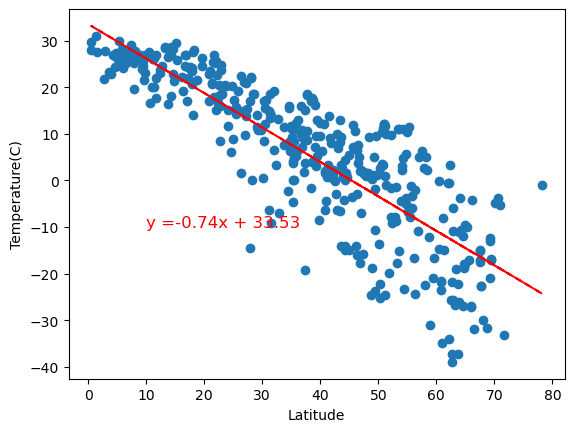

In [15]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value between Lat and Max Temp is 0.43


Text(0, 0.5, 'Temperature(C)')

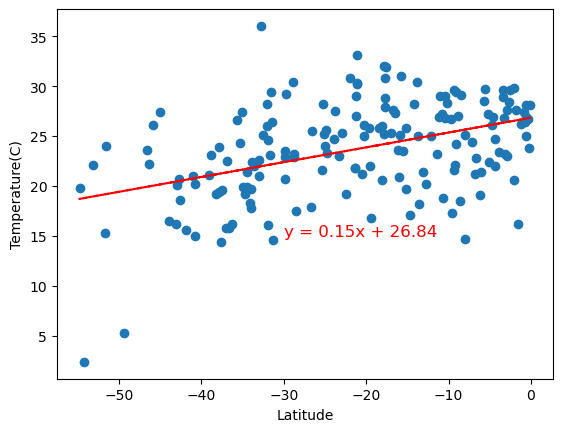

In [16]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 15))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

**Discussion about the linear relationship:  In Northern Hemisphere, a city's latitude and temperature have very weak strenght of correlation negative coorelation -0.81 that is to say the higher latitude of the city, the lower temperture the city would be.
In Southern Hemisphere, a city's latitude and temperature have a weak strength of coorelation positive coorelation 0.43 that is to say the higher latitude on the city, the higher temperature the city would be.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.4


Text(0, 0.5, 'Humidity(%)')

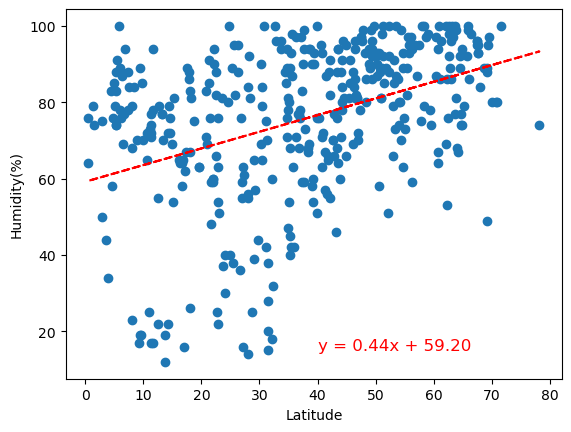

In [17]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(40, 15))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is 0.48


Text(0, 0.5, 'Humidity(%)')

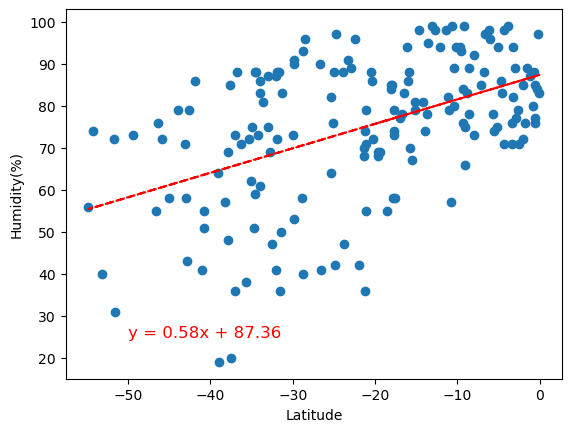

In [18]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:  In Northern Hemisphere, a city's latitude and humidity have weak strenght of correlation 0.4 that is to say the with increases, the city's humidity is likely to increae but not much. 
In Souther Hemisphere, a city's latitude and humidity also have a weak strength of correlation 0.48 that is to say with latitude increase, city's humidity is likely to increase buty quick minimal.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.26


Text(0, 0.5, 'Cloudiness(%)')

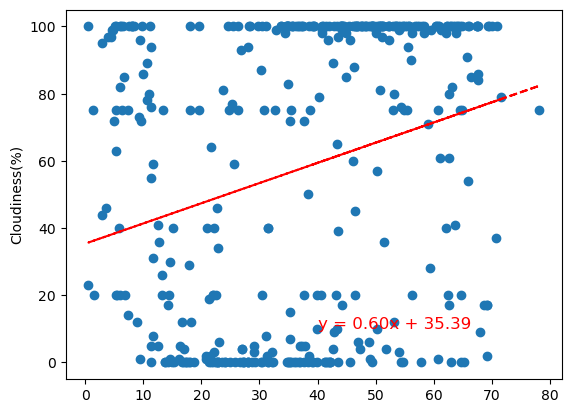

In [19]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(40,10)) 
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is 0.29


Text(0, 0.5, 'Cloudiness(%)')

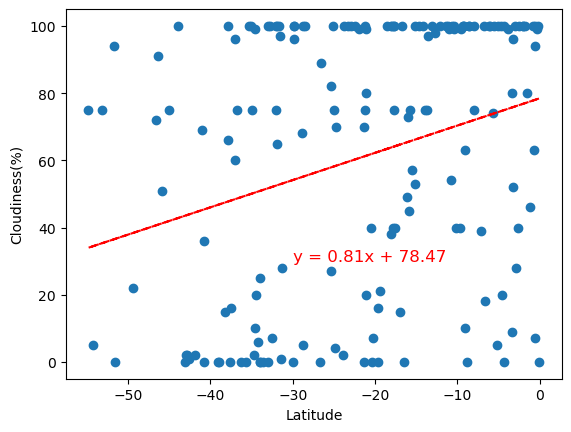

In [20]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-30, 30))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship: In northern hemisphere, a city's latitude and cloudiness level have very weak strength of coorelation positive coorelation 0.26 that is to say a city's cloudiness level does not much related to its latitude, in southern hemisphere, it is a similar situation with none strength of coorelation positive coorelation 0.29 between city's latitude and cloudiness level.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is -0.05


Text(0, 0.5, 'Wind Speed(m/s)')

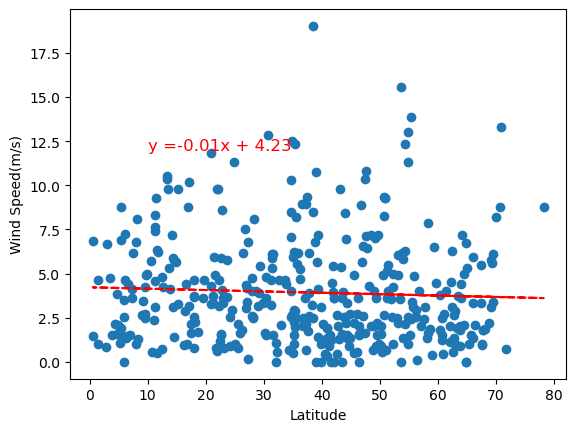

In [21]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.29


Text(0, 0.5, 'Wind Speed(m/s)')

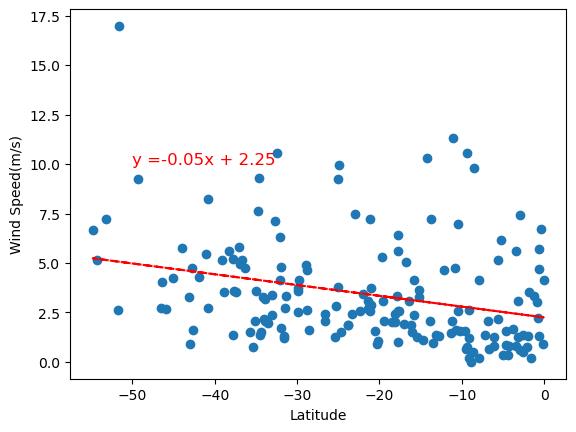

In [22]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 10))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship: In northern hemisphere, a city's latitude and wind speed have none strength of coorelation negative coorelation -0.05 that is to say a city's windy level does not much related to its latitude, in southern hemisphere, it is a similar situation with none strength of correlation negative coorelation -0.29 between city's latitude and wind speed.